Lab 1: Setting up Python, geodata, and parakeets
===

1a: Setting up your Python environment
---

Create a virtual environment that you will use for this course, using 
EITHER conda or virtualenv. The file
`requirements.txt`
shows all the python module requirements to install.

It installs a lot - the idea is to create a virtual environment that is ready for all the different lab exercises.

When you set up your environment, you should do it in such a way that you will be able to **re-activate the environment in future weeks**, so that you don't have to run it all over again.

In [1]:
# First ensure your conda/virtualenv is activated for your session.
# Here's how I do it (on the command line, the CLI).
# (I'm using virtualenv not conda.)
#    virtualenv venv_ai4ne
#    source ./venv_ai4ne/bin/activate
#    ipython kernel install --user --name=venv_ai4ne
# Next you can launch jupyter if you want, or continue this on the CLI.

In [2]:
# Now install the dependencies
!pip install --upgrade pip
!pip install -r requirements.txt

/bin/bash: /home/danaconda/projects/AI4NE_code/venv_ai4ne_2/bin/pip: /home/danaconda/projects/AI4NE/venv_ai4ne_2/bin/python: bad interpreter: No such file or directory


/bin/bash: /home/danaconda/projects/AI4NE_code/venv_ai4ne_2/bin/pip: /home/danaconda/projects/AI4NE/venv_ai4ne_2/bin/python: bad interpreter: No such file or directory


For me the installation takes about 15 minutes
(mostly due to installing Torch and NVIDIA libraries).
You can make a start on the first exercise 
even before this has finished.

1b: Geographic analysis of parakeets
---

We're going to analyse the presence of invasive rose-ringed parakeets (Psittacula krameri) in the Netherlands, using crowdsourced observation data.

<img src="https://1.bp.blogspot.com/-hKqTCTUpjYg/XSNZ5bqYBsI/AAAAAAAAA3Q/DLYZzr55b4oDD5Wj6lwM2XbG3eJBFojwgCLcBGAs/s1600/ringneck_parrot.jpg" alt="Rose ringed parakeet" width="50%"/>

Download and extract the dataset **parakeetsNL400observations.zip** (2.7 MB): https://surfdrive.surf.nl/files/index.php/s/2O3mDnLoBCUr4tP

You can open it in Excel to inspect it (it uses TAB-separated values). Look at these columns especially: `individualCount, decimalLatitude, decimalLongitude, eventDate, mediaType`

In [3]:
# requirements.txt was missing, so I installed the packages manually
!pip install pandas geopandas matplotlib

/bin/bash: /home/danaconda/projects/AI4NE_code/venv_ai4ne_2/bin/pip: /home/danaconda/projects/AI4NE/venv_ai4ne_2/bin/python: bad interpreter: No such file or directory


In [4]:
# Import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import plotly.express as plotlyx

In [5]:
# Load the CSV of parakeet observations
# datapath = '/home/dans/Documents/tilnat/teaching_planning/ai4ne/datasets/parakeetsNL400/occurrence_parakeetsNL_roseringed.tsv'
datapath = 'datasets/parakeetsNL400observations/occurrence_parakeetsNL_roseringed.tsv'
df = pd.read_csv(datapath, delimiter="\t", low_memory=False)
df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,year,basisOfRecord,institutionCode,collectionCode,catalogNumber,identifiedBy,license,rightsHolder,recordedBy,mediaType
0,979544661,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS240283283,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Psittacula,Psittacula krameri,...,2012.0,HUMAN_OBSERVATION,CLO,EBIRD,OBS240283283,NaN,CC_BY_4_0,NaN,obsr240555,NaN
1,979313695,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS239103121,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Psittacula,Psittacula krameri,...,2013.0,HUMAN_OBSERVATION,CLO,EBIRD,OBS239103121,NaN,CC_BY_4_0,NaN,obsr370975,NaN
2,979049243,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS237336989,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Psittacula,Psittacula krameri,...,2013.0,HUMAN_OBSERVATION,CLO,EBIRD,OBS237336989,NaN,CC_BY_4_0,NaN,obsr428923,NaN
3,979048328,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS237336763,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Psittacula,Psittacula krameri,...,2013.0,HUMAN_OBSERVATION,CLO,EBIRD,OBS237336763,NaN,CC_BY_4_0,NaN,obsr428923,NaN
4,977840381,4fa7b334-ce0d-4e88-aaae-2e0c138d049e,URN:catalog:CLO:EBIRD:OBS227514482,Animalia,Chordata,Aves,Psittaciformes,Psittacidae,Psittacula,Psittacula krameri,...,2013.0,HUMAN_OBSERVATION,CLO,EBIRD,OBS227514482,NaN,CC_BY_4_0,NaN,obsr450784,NaN


Let's create a plot showing the spatial distribution of the data points. We start with a simple scatter plot ("plt.scatter()") to show the data points themselves. A more advanced plot would show a map for context.

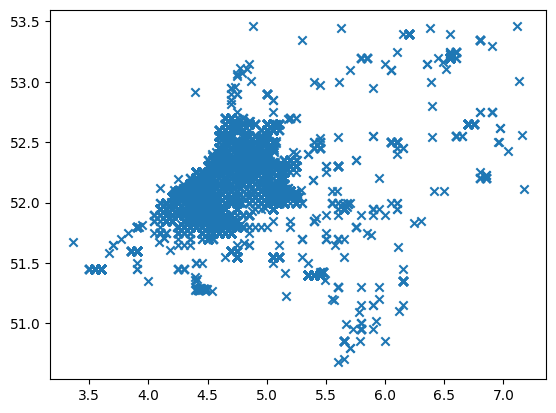

In [6]:
# Now a simple scatter plot
# df['decimalLongitude'] on the X axis and df['decimalLatitude'] the Y axis
plt.scatter(df['decimalLongitude'], df['decimalLatitude'], marker='x')

Write code below to answer the following questions:

1. In your data, are there parakeets in the Tilburg area?
2. If so, how many, in which years?

In [7]:
# These values might be useful:
# Tilburg's decimal coordinates
loc_tilburg = (51.55, 5.083)   # lat, lon
# A "bbox" surrounding Tilburg
bbox_tilburg = [51.52583,4.95964,51.61375,5.17662]   # lat, lon, lat, lon

# Your code here
df_tilburg = df[(df['decimalLatitude'] > bbox_tilburg[0]) & (df['decimalLatitude'] < bbox_tilburg[2]) & (df['decimalLongitude'] > bbox_tilburg[1]) & (df['decimalLongitude'] < bbox_tilburg[3])]

print(f'number of parakeet observations in Tilburg: {df_tilburg.shape[0]}')
print(f'they are from the years: {df_tilburg["year"].unique()}')


number of parakeet observations in Tilburg: 60
they are from the years: [2023. 2022. 2021. 2020. 2019.]


Analyse the data and write some notes about the data quality. Do the data seem to be complete? Do they come from multiple sources, or just one? Multiple years? Are there any biases or other issues apparent in the data? Overall, can we trust that the distribution of points represents the true distribution of individuals?

Data completeness

In [8]:
print(f'nans: {df.isnull().sum().sum()}')
print(f'size: {df.size}')
print(f'percentage of nans: {df.isnull().sum().sum()/df.size*100}%')

nans: 298368
size: 2570645
percentage of nans: 11.60673683063978%


In [9]:
# percentage of nans per column
df.isnull().sum().sort_values(ascending=False)/len(df)*100

coordinatePrecision              99.946900
identifiedBy                     99.475812
institutionCode                  92.793443
mediaType                        90.153444
coordinateUncertaintyInMeters    13.420562
rightsHolder                      6.926083
individualCount                   1.846229
locality                          0.552780
catalogNumber                     0.341743
collectionCode                    0.303620
stateProvince                     0.176998
recordedBy                        0.099391
occurrenceID                      0.061269
day                               0.038123
month                             0.034038
year                              0.032677
eventDate                         0.032677
datasetKey                        0.000000
gbifID                            0.000000
decimalLatitude                   0.000000
occurrenceStatus                  0.000000
verbatimScientificName            0.000000
countryCode                       0.000000
scientificN

Some columns have many missing values but the more important ones are nearly complete.

Sources

In [10]:
print(f'number of sources: {df["datasetKey"].nunique() }')

number of sources: 20


In [11]:
# number of observations per source
df["datasetKey"].value_counts()

datasetKey
8a863029-f435-446a-821e-275f4f641165    67897
4fa7b334-ce0d-4e88-aaae-2e0c138d049e     4798
50c9509d-22c7-4a22-a47d-8c48425ef4a7      353
6ff8b3b0-ef0f-4f79-a310-5a5615c6aa0b      215
6ac3f774-d9fb-4796-b3e9-92bf6c81c084       43
a307e4d7-1de2-4adc-95d5-a0a8d5f57236       39
b1047888-ae52-4179-9dd5-5448ea342a24       22
c779b049-28f3-4daf-bbf4-0a40830819b6       22
99047b1e-ee53-4053-ba69-2e28eaaa45d9       17
889c91a3-614f-4355-8df8-b6d0260a118c       13
8ae09016-b819-450e-b8f6-c1f249110502       10
9a0b66df-7535-4f28-9f4e-5bc11b8b096c        6
b84a3711-b4ca-4e4f-adac-80dfaea98d1c        4
df12ca07-f133-4550-ab3b-fde13f0e76ba        2
04871911-1b00-41f3-8dc6-fc0cea421f96        1
cb6e66f1-3056-404d-a341-bb856762c57c        1
629befd5-fb45-4365-95c4-d07e72479b37        1
aa6c5ee6-d4d7-4a65-a04f-379cffbf4842        1
81c5a091-6e94-40db-a2a4-48f4de42d410        1
e6c97f6e-e952-11e2-961f-00145eb45e9a        1
Name: count, dtype: int64

Years of observations

In [12]:
print(f'years: {int(df["year"].min())} - {int(df["year"].max())}')
print(f'number of years: {len(df["year"].unique())}')

years: 1976 - 2023
number of years: 38


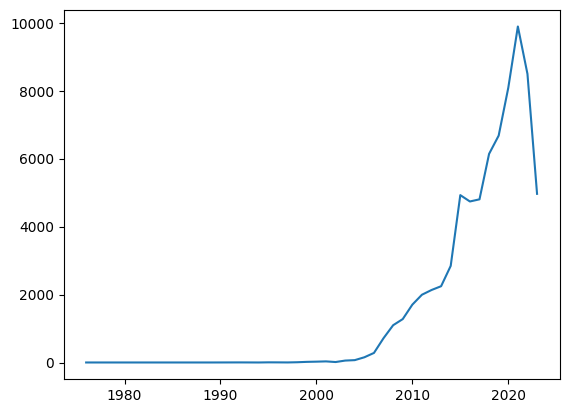

In [13]:
# number of observations per year
plt.plot(df["year"].value_counts().sort_index())

Biases

In [14]:
df["basisOfRecord"].unique()

array(['HUMAN_OBSERVATION', 'MACHINE_OBSERVATION', 'PRESERVED_SPECIMEN',
       'OCCURRENCE'], dtype=object)

In [15]:
# value counts of basisOfRecord
df["basisOfRecord"].value_counts()

basisOfRecord
HUMAN_OBSERVATION      73387
PRESERVED_SPECIMEN        52
OCCURRENCE                 6
MACHINE_OBSERVATION        2
Name: count, dtype: int64

Human observations might lead to biased inferences about parakeets as the voluntary observer contributions were not organized to sample uniformly accros space and time

---

***OPTIONAL EXTRA:*** Our data came from **GBIF**. Choose a different species (or taxonomic group), and download its observation data from GBIF. Make sure that you choose a geographic range so that you have at least 1,000 data points in the download, but not too many (not more than 100,000).

https://www.gbif.org/occurrence/search

It will take a few minutes for the data download to be generated for you.
Repeat the plotting and analysis steps you did for the parakeet data.

**Saker falcon observations**

In [16]:
# Your code here

# saker falcon observations were downloaded from GBIF

datapath_falcon = 'datasets/falco_cherrug_observations.csv'
df2 = pd.read_csv(datapath_falcon, delimiter="\t", low_memory=False)
df2.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,921706767,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Aves,Falconiformes,Falconidae,Falco,Falco cherrug,...,NaN,NaN,CC_BY_4_0,NaN,205308930,NaN,NaN,2024-03-15T23:23:53.793Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
1,921705779,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Aves,Falconiformes,Falconidae,Falco,Falco cherrug,...,NaN,NaN,CC_BY_4_0,NaN,33304576,NaN,NaN,2024-03-15T23:26:10.328Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
2,921705087,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Aves,Falconiformes,Falconidae,Falco,Falco cherrug,...,NaN,NaN,CC_BY_4_0,NaN,881932368,NaN,NaN,2024-03-15T23:23:21.814Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
3,921705010,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Aves,Falconiformes,Falconidae,Falco,Falco cherrug,...,NaN,NaN,CC_BY_4_0,NaN,-640879862,NaN,NaN,2024-03-15T23:20:35.506Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...
4,921704544,6ac3f774-d9fb-4796-b3e9-92bf6c81c084,NaN,Animalia,Chordata,Aves,Falconiformes,Falconidae,Falco,Falco cherrug,...,NaN,NaN,CC_BY_4_0,NaN,-640879862,NaN,NaN,2024-03-15T23:23:47.488Z,NaN,COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS8...


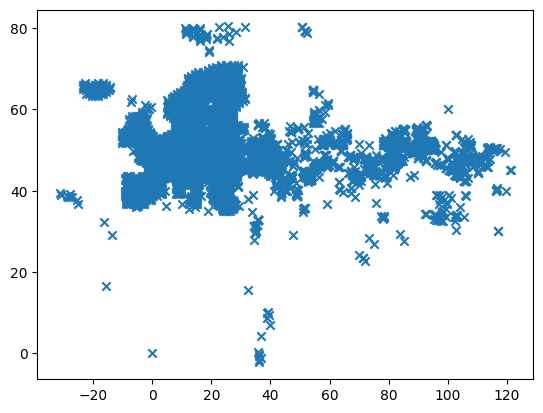

In [17]:
plt.scatter(df2['decimalLongitude'], df2['decimalLatitude'], marker='x')

Saker falcons were observed across all of Europe, and continental Asia. Few observation were also made around the equatorial in Africa

In [18]:
# These values might be useful:
# Tilburg's decimal coordinates
loc_tilburg = (51.55, 5.083)   # lat, lon
# A "bbox" surrounding Tilburg
bbox_tilburg = [51.52583,4.95964,51.61375,5.17662]   # lat, lon, lat, lon

# Your code here
df_tilburg = df2[(df2['decimalLatitude'] > bbox_tilburg[0]) & (df2['decimalLatitude'] < bbox_tilburg[2]) & (df2['decimalLongitude'] > bbox_tilburg[1]) & (df2['decimalLongitude'] < bbox_tilburg[3])]

print(f'number of saker falcon observations in Tilburg: {df_tilburg.shape[0]}')
print(f'they are from the years: {df_tilburg["year"].unique()}')

number of saker falcon observations in Tilburg: 0
they are from the years: []


No saker falcons were observed around tilburg

In [19]:
# A "bbox" surrounding Tilburg
bbox_tilburg = [50.55,4.68,52.55,5.48]   # lat, lon, lat, lon

# Your code here
df_tilburg = df2[(df2['decimalLatitude'] > bbox_tilburg[0]) & (df2['decimalLatitude'] < bbox_tilburg[2]) & (df2['decimalLongitude'] > bbox_tilburg[1]) & (df2['decimalLongitude'] < bbox_tilburg[3])]

print(f'number of saker falcon observations in Tilburg: {df_tilburg.shape[0]}')
print(f'they are from the years: {df_tilburg["year"].unique()}')

number of saker falcon observations in Tilburg: 12
they are from the years: [2005. 1999. 2012. 2009. 2007.   nan]


In the bigger region around tilburg (bounding box 4-times wider in latitude and longtitude), there were observation of saker falcon

Data completeness

In [20]:
print(f'nans: {df2.isnull().sum().sum()}')
print(f'size: {df2.size}')
print(f'percentage of nans: {df2.isnull().sum().sum()/df2.size*100}%')

nans: 179759
size: 464550
percentage of nans: 38.69529652351738%


In [21]:
# percentage of nans per column
df2.isnull().sum().sort_values(ascending=False)/len(df2)*100

depth                               100.000000
depthAccuracy                       100.000000
typeStatus                           99.978474
coordinatePrecision                  99.870843
elevationAccuracy                    99.644818
recordNumber                         99.504897
elevation                            99.311161
establishmentMeans                   99.300398
infraspecificEpithet                 97.890432
verbatimScientificNameAuthorship     96.028415
dateIdentified                       93.649769
mediaType                            88.192875
identifiedBy                         87.116564
rightsHolder                         85.039285
locality                             82.391562
stateProvince                        55.128619
institutionCode                      54.870305
catalogNumber                        50.877193
collectionCode                       50.371327
coordinateUncertaintyInMeters        47.637499
individualCount                      45.635561
recordedBy   

There is a high proportion of missing values, even for more important attributes, such as the time of observation.

Sources

In [22]:
print(f'number of sources: {df2["datasetKey"].nunique() }')

number of sources: 135


In [23]:
# number of observations per source
df2["datasetKey"].value_counts()

datasetKey
c779b049-28f3-4daf-bbf4-0a40830819b6    2610
b941d3d1-964e-47dc-a3e7-f8edb144e051    2603
d8cd16ba-bb74-4420-821e-083f2bac17c2    1173
50c9509d-22c7-4a22-a47d-8c48425ef4a7     497
8a863029-f435-446a-821e-275f4f641165     470
                                        ... 
533e8bc0-925e-11da-8900-b8a03c50a862       1
63879c9a-f762-11e1-a439-00145eb45e9a       1
f06fef3c-6ea6-4345-b724-a1b8e490dc55       1
85877766-f762-11e1-a439-00145eb45e9a       1
43e0bba3-9edb-4b00-b490-84924e55a222       1
Name: count, Length: 135, dtype: int64

Years of observations

In [24]:
print(f'years: {int(df2["year"].min())} - {int(df2["year"].max())}')
print(f'number of years: {len(df2["year"].unique())}')

years: 1840 - 2024
number of years: 153


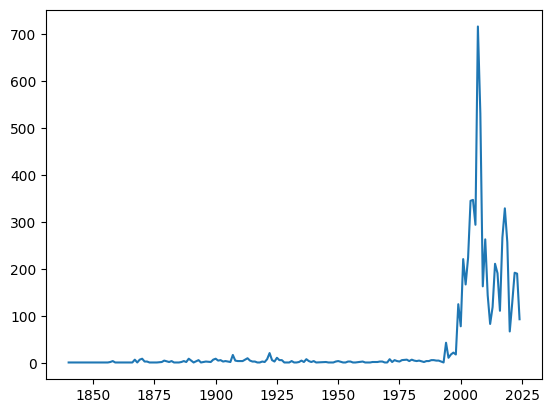

In [25]:
# number of observations per year
plt.plot(df2["year"].value_counts().sort_index())

Biases

In [26]:
df2["basisOfRecord"].unique()

array(['HUMAN_OBSERVATION', 'PRESERVED_SPECIMEN', 'OBSERVATION',
       'MATERIAL_CITATION', 'OCCURRENCE', 'MATERIAL_SAMPLE'], dtype=object)

In [27]:
# value counts of basisOfRecord
df2["basisOfRecord"].value_counts()

basisOfRecord
HUMAN_OBSERVATION     7348
MATERIAL_SAMPLE       1147
PRESERVED_SPECIMEN     638
MATERIAL_CITATION      125
OCCURRENCE              22
OBSERVATION             11
Name: count, dtype: int64

Human observations might lead to biased inferences about parakeets as the voluntary observer contributions were not organized to sample uniformly accros space and time